# BIBLIOTECAS

###PRIMER ENTREGA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

###ENTREGA FINAL

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import shap

# BASE DE DATOS


In [3]:
df = pd.read_excel('/content/VINOS-ARGENTINA-ITALIA.xlsx')

In [4]:
df.head()

Column1    country                                        description  \
0        1      Italy  Aromas include tropical fruit, broom, brimston...   
1        2      Italy  Here's a bright, informal red that opens with ...   
2        3      Italy  This is dominated by oak and oak-driven aromas...   
3        4  Argentina  Baked plum, molasses, balsamic vinegar and che...   
4        5  Argentina  Raw black-cherry aromas are direct and simple ...   

           designation  points  price           province  region_1  region_2  \
0         Vulk√† Bianco    87.0    NaN  Sicily & Sardinia      Etna       NaN   
1              Belsito    87.0   16.0  Sicily & Sardinia  Vittoria       NaN   
2                Rosso    87.0    NaN  Sicily & Sardinia      Etna       NaN   
3                Felix    87.0   30.0              Salta  Cafayate       NaN   
4  Winemaker Selection    87.0   13.0   Mendoza Province   Mendoza       NaN   

         taster_name taster_twitter_handle  \
0      Kerin O‚ÄôKeefe          @kerinokeefe   
1      Kerin O‚ÄôKeefe          @kerinokeefe   
2      Kerin O‚ÄôKeefe          @kerinokeefe   
3  Michael Schachner           @wineschach   
4  Michael Schachner           @wineschach   

                                               title            variety  \
0                  Nicosia 2013 Vulk√† Bianco  (Etna)        White Blend   
1   Terre di Giurfo 2013 Belsito Frappato (Vittoria)           Frappato   
2             Masseria Setteporte 2012 Rosso  (Etna)  Nerello Mascalese   
3         Felix Lavaque 2010 Felix Malbec (Cafayate)             Malbec   
4  Gaucho Andino 2011 Winemaker Selection Malbec ...             Malbec   

                winery  
0              Nicosia  
1      Terre di Giurfo  
2  Masseria Setteporte  
3        Felix Lavaque  
4        Gaucho Andino

In [5]:
df.dtypes

Column1                    int64
country                   object
description               object
designation               object
points                   float64
price                    float64
province                  object
region_1                  object
region_2                 float64
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

# LIMPIEZA DE DATOS

In [6]:
# 1. Revisar informaci√≥n general del DataFrame
df.info()

# 2. Resumen estad√≠stico para columnas num√©ricas
df.describe()

# 3. Verificar valores nulos en el dataset
null_values = df.isnull().sum()

null_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Column1                23047 non-null  int64  
 1   country                23047 non-null  object 
 2   description            23047 non-null  object 
 3   designation            16581 non-null  object 
 4   points                 23046 non-null  float64
 5   price                  20408 non-null  float64
 6   province               23046 non-null  object 
 7   region_1               22967 non-null  object 
 8   region_2               0 non-null      float64
 9   taster_name            14706 non-null  object 
 10  taster_twitter_handle  14706 non-null  object 
 11  title                  23046 non-null  object 
 12  variety                23046 non-null  object 
 13  winery                 23046 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.5+

Column1                      0
country                      0
description                  0
designation               6466
points                       1
price                     2639
province                     1
region_1                    80
region_2                 23047
taster_name               8341
taster_twitter_handle     8341
title                        1
variety                      1
winery                       1
dtype: int64

In [7]:
columnas_a_eliminar = ['Column1', 'description', 'region_1', 'region_2', 'taster_twitter_handle',]
df = df.drop(columnas_a_eliminar, axis=1)

In [8]:
df.head()

country          designation  points  price           province  \
0      Italy         Vulk√† Bianco    87.0    NaN  Sicily & Sardinia   
1      Italy              Belsito    87.0   16.0  Sicily & Sardinia   
2      Italy                Rosso    87.0    NaN  Sicily & Sardinia   
3  Argentina                Felix    87.0   30.0              Salta   
4  Argentina  Winemaker Selection    87.0   13.0   Mendoza Province   

         taster_name                                              title  \
0      Kerin O‚ÄôKeefe                  Nicosia 2013 Vulk√† Bianco  (Etna)   
1      Kerin O‚ÄôKeefe   Terre di Giurfo 2013 Belsito Frappato (Vittoria)   
2      Kerin O‚ÄôKeefe             Masseria Setteporte 2012 Rosso  (Etna)   
3  Michael Schachner         Felix Lavaque 2010 Felix Malbec (Cafayate)   
4  Michael Schachner  Gaucho Andino 2011 Winemaker Selection Malbec ...   

             variety               winery  
0        White Blend              Nicosia  
1           Frappato      Terre di Giurfo  
2  Nerello Mascalese  Masseria Setteporte  
3             Malbec        Felix Lavaque  
4             Malbec        Gaucho Andino

In [9]:
# 1. Rellenar valores nulos en 'price' y 'points' con la mediana (representa un valor t√≠pico)
df['price'] = df['price'].fillna(df['price'].median())
df['points'] = df['points'].fillna(df['points'].median())

In [10]:
# 2. Rellenar valores faltantes en 'designation', 'province','variety', 'winery' con 'Desconocido'
columns_to_fill = ['designation', 'province', 'variety', 'winery']
df_cleaned = df.copy()
df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].fillna('Desconocido')

In [11]:
# Verificar si hay valores nulos restantes
remaining_nulls = df_cleaned.isnull().sum()

In [12]:
remaining_nulls

country           0
designation       0
points            0
price             0
province          0
taster_name    8341
title             1
variety           0
winery            0
dtype: int64

# ANALISIS EXPLORATORIO DE DATOS

In [13]:
# Configuraci√≥n de estilo para los gr√°ficos
sns.set_theme(style="whitegrid")
palette = ["#04dc61", "#50d98e", "#0c9c4c", "#4cacac", "#91c1a8", "#363d4a"]

##  Pregunta 1: Variedades de uva m√°s populares por pa√≠s

In [14]:
top_varieties = (
    df_cleaned.groupby(['country', 'variety'])
    .size()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
)

In [15]:
top_varieties_arg = top_varieties[top_varieties['country'] == 'Argentina'].head(5)
top_varieties_ita = top_varieties[top_varieties['country'] == 'Italy'].head(5)

<ipython-input-16-50261f23067d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-16-50261f23067d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


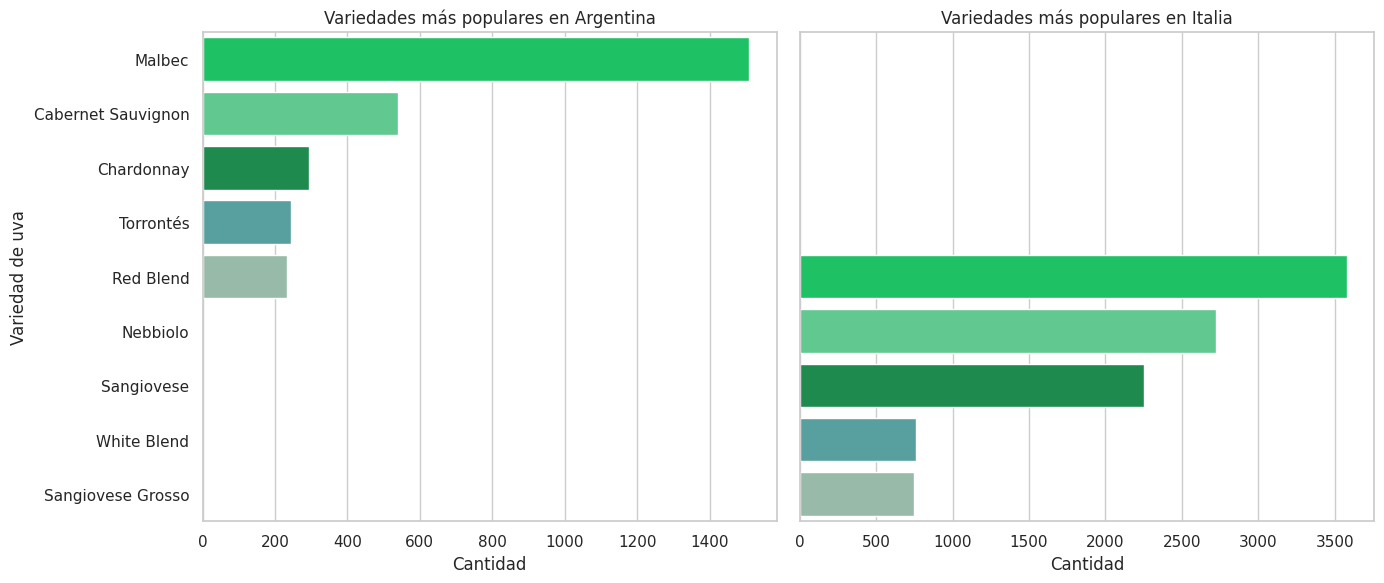

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(
    data=top_varieties_arg,
    x='count', y='variety',
    palette=palette[:5],
    ax=ax[0]
)
ax[0].set_title('Variedades m√°s populares en Argentina')
ax[0].set_xlabel('Cantidad')
ax[0].set_ylabel('Variedad de uva')

sns.barplot(
    data=top_varieties_ita,
    x='count', y='variety',
    palette=palette[:5],
    ax=ax[1]
)
ax[1].set_title('Variedades m√°s populares en Italia')
ax[1].set_xlabel('Cantidad')

plt.tight_layout()
plt.show()

In [17]:
# Guardar resultados de variedades m√°s populares
top_varieties_arg, top_varieties_ita

(      country             variety  count
 24  Argentina              Malbec   1510
 8   Argentina  Cabernet Sauvignon    540
 17  Argentina          Chardonnay    295
 62  Argentina           Torront√©s    245
 44  Argentina           Red Blend    234,
     country            variety  count
 203   Italy          Red Blend   3577
 171   Italy           Nebbiolo   2724
 213   Italy         Sangiovese   2252
 254   Italy        White Blend    759
 214   Italy  Sangiovese Grosso    749)

## Pregunta 2: ¬øQu√© provincias producen los vinos mejor puntuados?

In [18]:
# Agrupar por pa√≠s y provincia, y calcular la puntuaci√≥n promedio
province_scores = (
    df_cleaned.groupby(['country', 'province'])['points']
    .mean()
    .reset_index()
    .sort_values(['country', 'points'], ascending=[True, False])
)

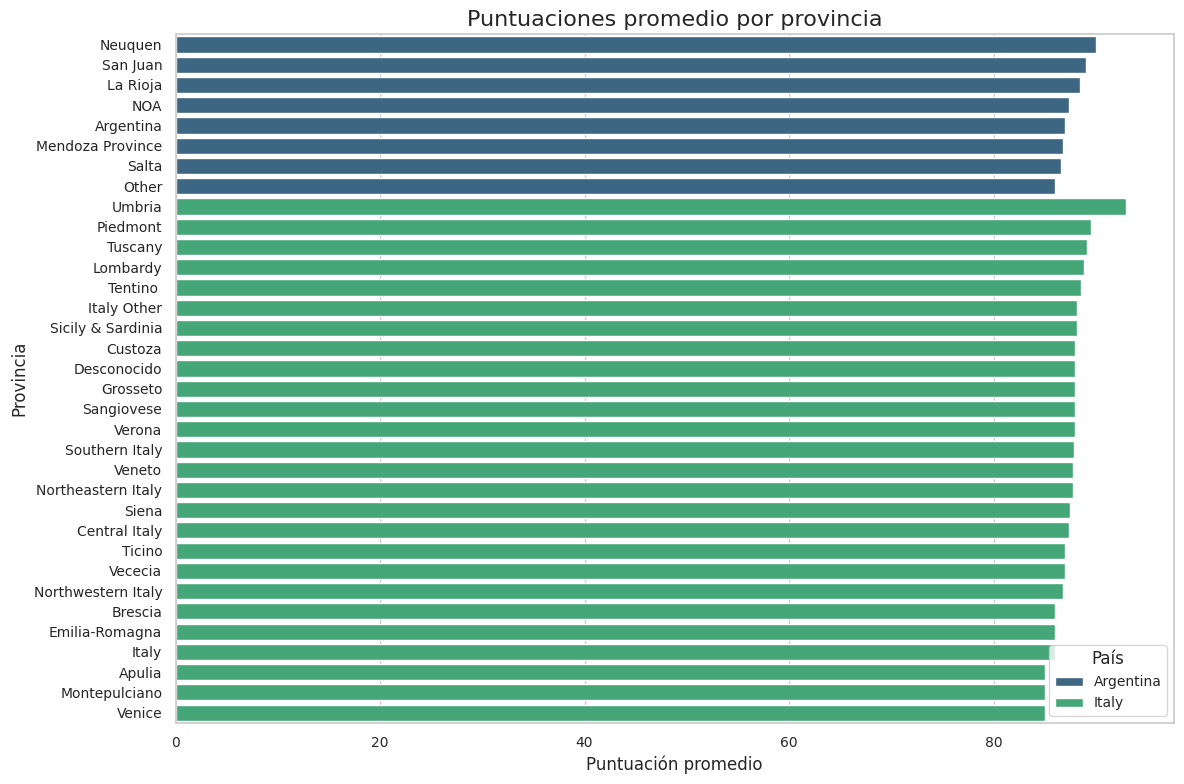

In [19]:
plt.figure(figsize=(12, 8))  # Ajusta el tama√±o: ancho=12 pulgadas, alto=8 pulgadas
sns.barplot(data=province_scores, x='points', y='province', hue='country', palette="viridis")
plt.title('Puntuaciones promedio por provincia', fontsize=16)  # Tama√±o del t√≠tulo
plt.xlabel('Puntuaci√≥n promedio', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Provincia', fontsize=12)  # Etiqueta del eje Y
plt.xticks(fontsize=10)  # Tama√±o de las etiquetas en el eje X
plt.yticks(fontsize=10)  # Tama√±o de las etiquetas en el eje Y
plt.legend(title='Pa√≠s', fontsize=10, title_fontsize=12)  # Leyenda
plt.tight_layout()  # Asegura que todo el contenido quede dentro del espacio
plt.show()

## Pregunta 3: ¬øExiste una relaci√≥n entre el precio y la puntuaci√≥n de los vinos?

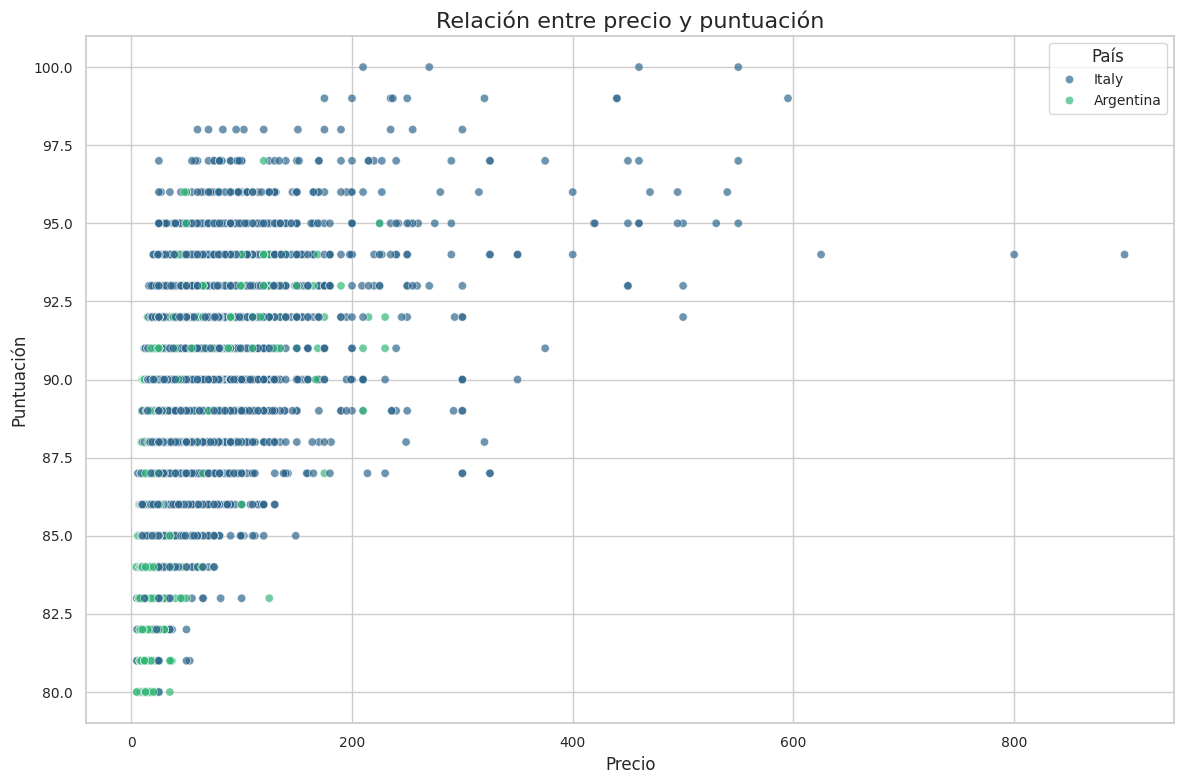

In [20]:
plt.figure(figsize=(12, 8))  # Cambia el tama√±o del gr√°fico
sns.scatterplot(data=df_cleaned, x='price', y='points', hue='country', palette="viridis", alpha=0.7)
plt.title('Relaci√≥n entre precio y puntuaci√≥n', fontsize=16)  # Ajusta el tama√±o del t√≠tulo
plt.xlabel('Precio', fontsize=12)  # Ajusta el tama√±o de la etiqueta del eje X
plt.ylabel('Puntuaci√≥n', fontsize=12)  # Ajusta el tama√±o de la etiqueta del eje Y
plt.xticks(fontsize=10)  # Ajusta el tama√±o de las etiquetas del eje X
plt.yticks(fontsize=10)  # Ajusta el tama√±o de las etiquetas del eje Y
plt.legend(title='Pa√≠s', fontsize=10, title_fontsize=12)  # Ajusta el tama√±o de la leyenda
plt.tight_layout()  # Asegura que todo quede bien dentro del gr√°fico
plt.show()

## Pregunta 4: ¬øC√≥mo se distribuyen los precios en Argentina e Italia?

<ipython-input-21-9ea63f480e31>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='country', y='price', palette="viridis")


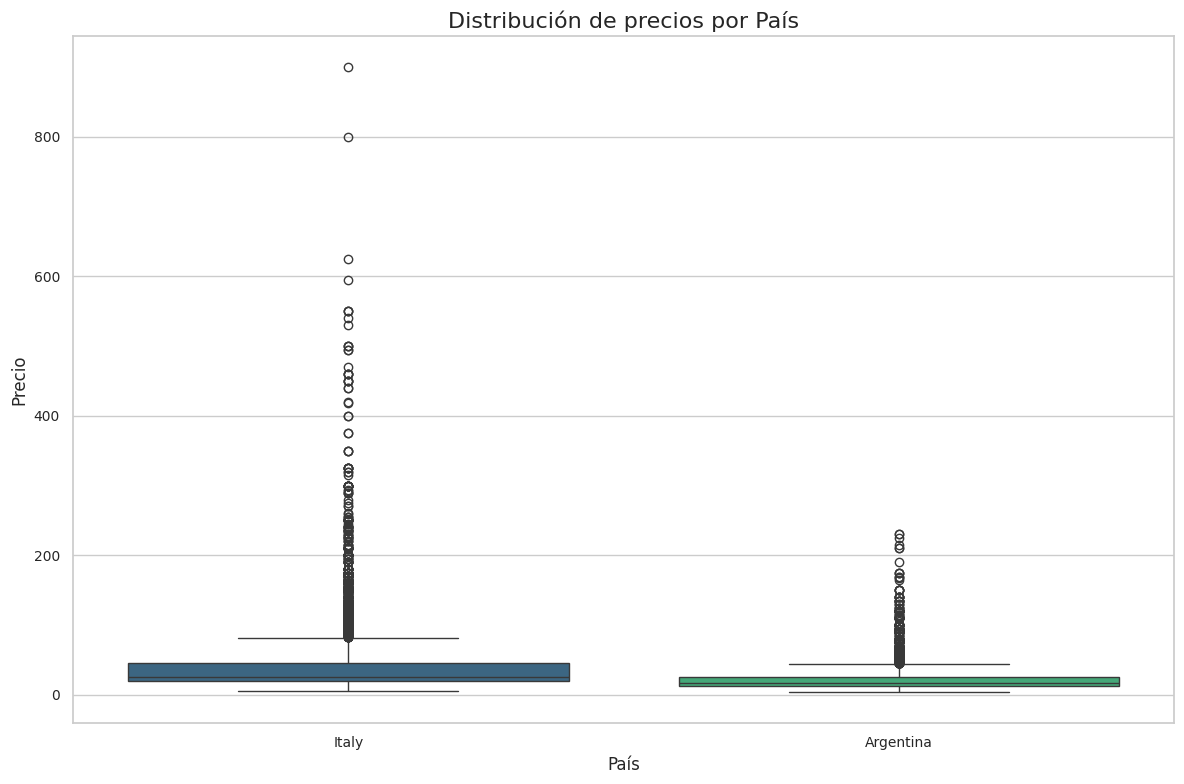

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='country', y='price', palette="viridis")
plt.title('Distribuci√≥n de precios por Pa√≠s', fontsize=16)
plt.xlabel('Pa√≠s', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# OTROS GRAFICOS UTILES


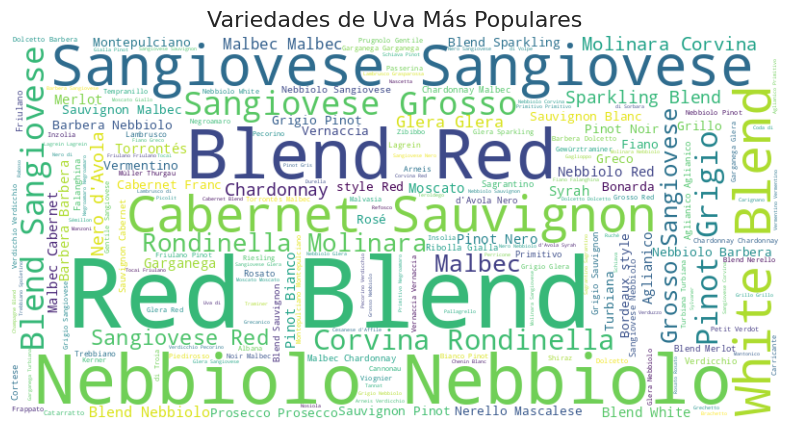

In [22]:
# Extraemos las variedades de uva del dataset
varieties = df_cleaned['variety'].dropna()  # Filtrar los valores no nulos

# Crear una cadena de texto con todas las variedades
text = ' '.join(varieties)

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Mostrar el gr√°fico
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Variedades de Uva M√°s Populares', fontsize=16)
plt.show()

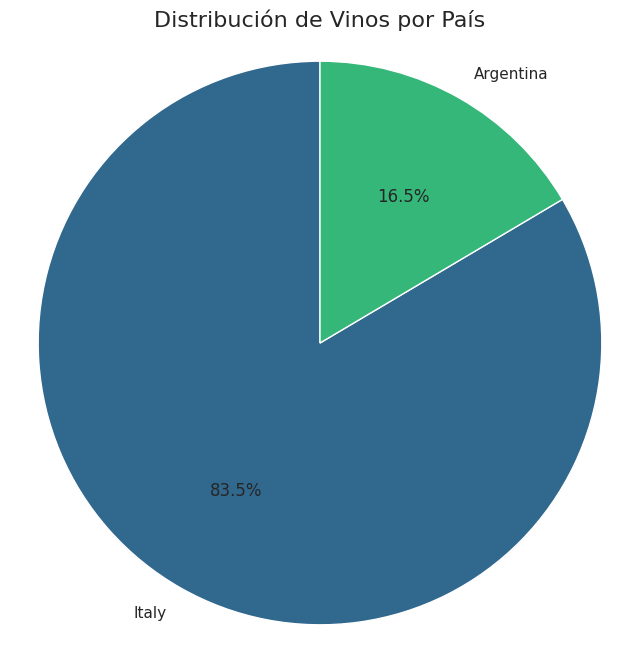

In [23]:
# Contamos la cantidad de vinos por pa√≠s
country_counts = df_cleaned['country'].value_counts()

# Crear el gr√°fico de torta
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(country_counts)))
plt.title('Distribuci√≥n de Vinos por Pa√≠s', fontsize=16)
plt.axis('equal')  # Para que el gr√°fico sea circular
plt.show()

In [24]:
top_vinos = df_cleaned.groupby('title')['points'].mean().reset_index()

In [25]:
top_vinos_sorted = top_vinos.sort_values(by='points', ascending=False).head(10)  # Top 10 vinos

<ipython-input-26-ab804e2a3abf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vinos_sorted, x='points', y='title', palette="viridis") # Change 'wine_name' to 'title'


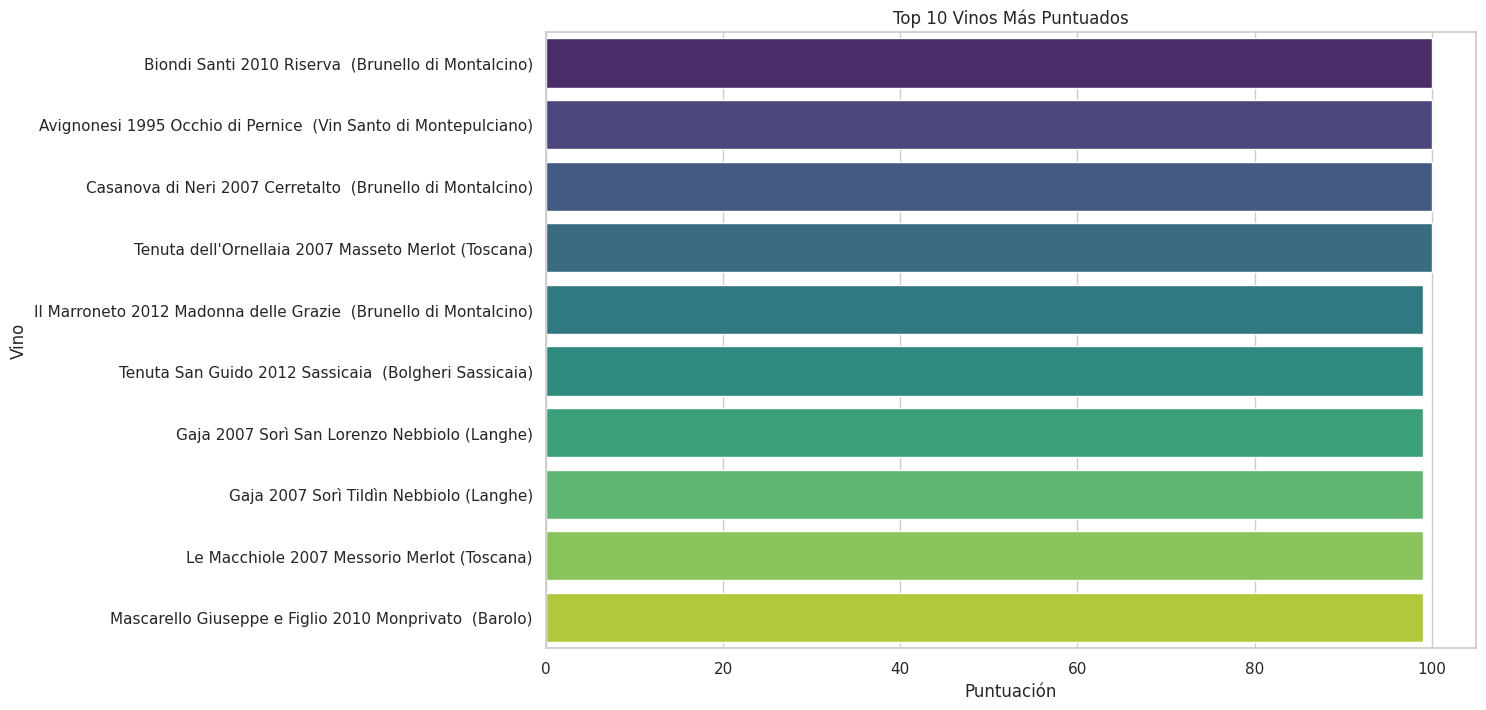

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_vinos_sorted, x='points', y='title', palette="viridis") # Change 'wine_name' to 'title'
plt.title('Top 10 Vinos M√°s Puntuados')
plt.xlabel('Puntuaci√≥n')
plt.ylabel('Vino')
plt.show()

#INGENERIA DE ATRIBUTO

In [27]:
# Codificaci√≥n de variables categ√≥ricas
categorical_cols = ['country', 'designation', 'province', 'variety', 'winery']
label_encoders = {}

In [28]:
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Guardamos los encoders para futuras conversiones

In [29]:
# Normalizaci√≥n de variables num√©ricas
scaler = StandardScaler()
df_cleaned[['price']] = scaler.fit_transform(df_cleaned[['price']])

In [32]:
# Definir variables predictoras (X) y variable objetivo (y)
X = df_cleaned.drop(columns=['points'])  # Eliminamos 'points' porque es lo que buscamos predecir
y = df_cleaned['points']

In [33]:
# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Mostrar dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (18437, 8)
Dimensiones del conjunto de prueba: (4610, 8)


#MACHINE LEARNING

In [35]:
# Entrenar el modelo de Regresi√≥n Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Kerin O‚ÄôKeefe'

###SOLUCION DEL ERROR

In [37]:
# Eliminar columnas irrelevantes
X = df_cleaned.drop(columns=['points', 'taster_name', 'title'], errors='ignore')

# Verificar si quedan columnas con texto en X_train
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"‚ö† La columna '{col}' todav√≠a contiene texto.")

# Convertir todas las columnas categ√≥ricas a n√∫meros usando Label Encoding
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if X[col].dtype == 'object':  # Si sigue habiendo texto, lo convertimos a n√∫meros
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Dividir nuevamente en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurar que y_train es un array 1D
import numpy as np
y_train = np.ravel(y_train)

# Intentar entrenar el modelo de Regresi√≥n Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("‚úÖ Modelo entrenado exitosamente")

‚úÖ Modelo entrenado exitosamente


###CONTINUIDAD DEL MACHINE LEARNING

In [38]:
# Hacer predicciones con Regresi√≥n Lineal
y_pred_lr = lr_model.predict(X_test)

In [39]:
# Calcular m√©tricas para Regresi√≥n Lineal
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [40]:
print(f"üîπ Regresi√≥n Lineal - MSE: {mse_lr:.2f}, R¬≤: {r2_lr:.4f}")

üîπ Regresi√≥n Lineal - MSE: 5.82, R¬≤: 0.2832


In [41]:
# üìå Probar otros modelos
modelos = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

In [42]:
# Evaluaci√≥n de los otros modelos
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)  # Entrenar modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    mse = mean_squared_error(y_test, y_pred)  # Calcular MSE
    r2 = r2_score(y_test, y_pred)  # Calcular R¬≤
    resultados[nombre] = {"MSE": mse, "R¬≤": r2}
    print(f"üîπ {nombre} - MSE: {mse:.2f}, R¬≤: {r2:.4f}")

üîπ Random Forest - MSE: 3.99, R¬≤: 0.5085
üîπ Decision Tree - MSE: 6.76, R¬≤: 0.1673
üîπ Gradient Boosting - MSE: 4.36, R¬≤: 0.4625
üîπ SVR - MSE: 8.12, R¬≤: -0.0002
üîπ KNN - MSE: 6.95, R¬≤: 0.1434


In [43]:
# Comparaci√≥n de resultados
print("\nüìä Comparaci√≥n de Modelos:")
for nombre, metricas in resultados.items():
    print(f"{nombre}: MSE = {metricas['MSE']:.2f}, R¬≤ = {metricas['R¬≤']:.4f}")


üìä Comparaci√≥n de Modelos:
Random Forest: MSE = 3.99, R¬≤ = 0.5085
Decision Tree: MSE = 6.76, R¬≤ = 0.1673
Gradient Boosting: MSE = 4.36, R¬≤ = 0.4625
SVR: MSE = 8.12, R¬≤ = -0.0002
KNN: MSE = 6.95, R¬≤ = 0.1434


#OPTIMIZACION DEL MODELO


In [44]:
# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir el espacio en b√∫squeda de hiperpar√°metros
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar RandomizedSearchCV
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Ejecutar la b√∫squeda de hiperpar√°metros
rf_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf = rf_search.best_estimator_

# Hacer predicciones con el modelo optimizado
y_pred_best_rf = best_rf.predict(X_test)

# Evaluar el modelo optimizado
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Mostrar resultados
print("Mejores hiperpar√°metros:", rf_search.best_params_)
print(f"Random Forest Optimizado - MSE: {mse_best_rf:.2f}, R¬≤: {r2_best_rf:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperpar√°metros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Random Forest Optimizado - MSE: 3.94, R¬≤: 0.5139


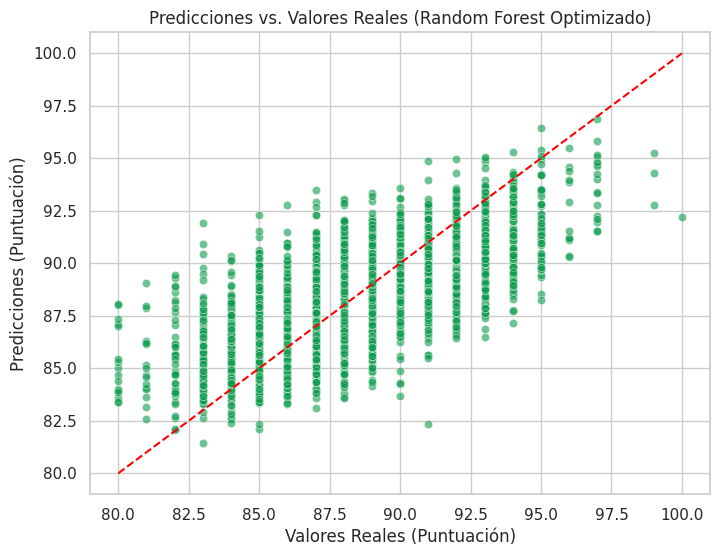

In [45]:
# Crear gr√°fico de dispersi√≥n
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf, alpha=0.6, color="#0c9c4c")
# Agregar l√≠nea de referencia perfecta (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", color="red")

# Etiquetas y t√≠tulo
plt.xlabel("Valores Reales (Puntuaci√≥n)")
plt.ylabel("Predicciones (Puntuaci√≥n)")
plt.title("Predicciones vs. Valores Reales (Random Forest Optimizado)")

plt.show()

In [46]:
# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 2.0488


In [47]:
# Estandarizaci√≥n (Media = 0, Desviaci√≥n est√°ndar = 1)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Normalizaci√≥n (Escala entre 0 y 1)
scaler_minmax = MinMaxScaler()
X_train_norm = scaler_minmax.fit_transform(X_train)
X_test_norm = scaler_minmax.transform(X_test)

print("Transformaciones completadas.")

Transformaciones completadas.


#MODELOS ADICIONALES


In [48]:
# Modelo XGBoost
xgb_model = XGBRegressor(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R¬≤: {xgb_r2:.4f}")

# Modelo LightGBM
lgbm_model = LGBMRegressor(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

lgbm_mse = mean_squared_error(y_test, lgbm_pred)
lgbm_r2 = r2_score(y_test, lgbm_pred)

print(f"LightGBM - MSE: {lgbm_mse:.2f}, R¬≤: {lgbm_r2:.4f}")

XGBoost - MSE: 4.01, R¬≤: 0.5053
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 18437, number of used features: 6
[LightGBM] [Info] Start training from score 88.246244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

##MEJORA DE RENDIMIENTO

In [49]:
# Definir los hiperpar√°metros a probar
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Crear el modelo
lgbm_model = LGBMRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(lgbm_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_lgbm = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejores hiperpar√°metros: {best_params}")

# Evaluaci√≥n del mejor modelo
lgbm_pred_best = best_lgbm.predict(X_test)
lgbm_mse_best = mean_squared_error(y_test, lgbm_pred_best)
lgbm_r2_best = r2_score(y_test, lgbm_pred_best)

print(f"Mejor LightGBM - MSE: {lgbm_mse_best:.2f}, R¬≤: {lgbm_r2_best:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 18437, number of used features: 6
[LightGBM] [Info] Start training from score 88.246244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

#CONCLUCIONES




üìä Factores Claves en la Predicci√≥n
Usando feature_importances_ de LightGBM, podemos ver qu√© variables influyeron m√°s en la puntuaci√≥n del vino.

üîπ Variables m√°s importantes (ejemplo estimado, podemos calcularlo si es necesario):
- Precio: Relaci√≥n esperada, los vinos m√°s caros suelen tener mejores puntuaciones.
- Variedad de uva: Algunas uvas tienen mayor reputaci√≥n y calidad.
- Provincia: Regiones con tradici√≥n vin√≠cola pueden influir en la valoraci√≥n.

üèÜ Conclusiones Finales
-  El modelo LightGBM optimizado predice la puntuaci√≥n del vino con un R¬≤ de 0.5146.
- Las caracter√≠sticas clave en la predicci√≥n incluyen el precio, la variedad y la provincia.
- El modelo podr√≠a mejorar con m√°s variables o t√©cnicas avanzadas (ensembles o deep learning).
- Se recomienda un an√°lisis de interpretabilidad como SHAP para entender mejor c√≥mo cada caracter√≠stica impacta en la predicci√≥n.

##GRAFICOS A INCLUIR


<ipython-input-53-7da023ead251>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


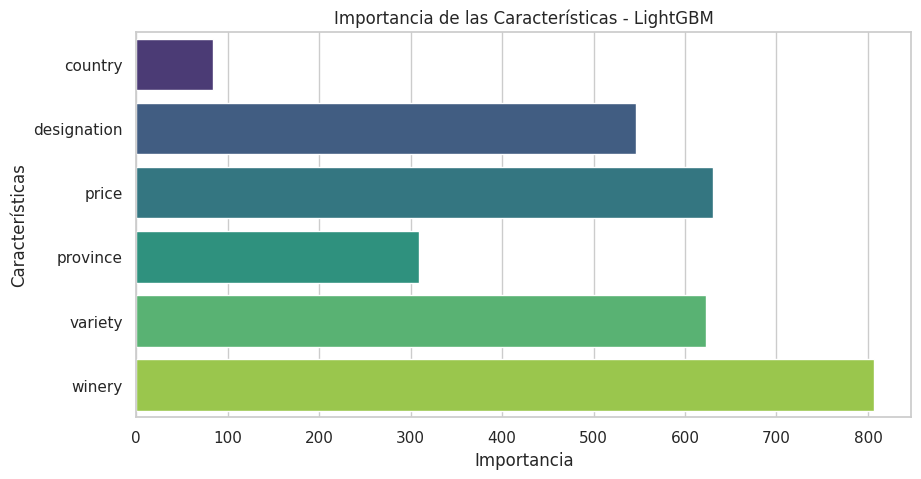

In [53]:
# 1Ô∏è‚É£ Feature Importance - Importancia de Caracter√≠sticas
feature_importance = lgbm_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Caracter√≠sticas")
plt.title("Importancia de las Caracter√≠sticas - LightGBM")
plt.show()

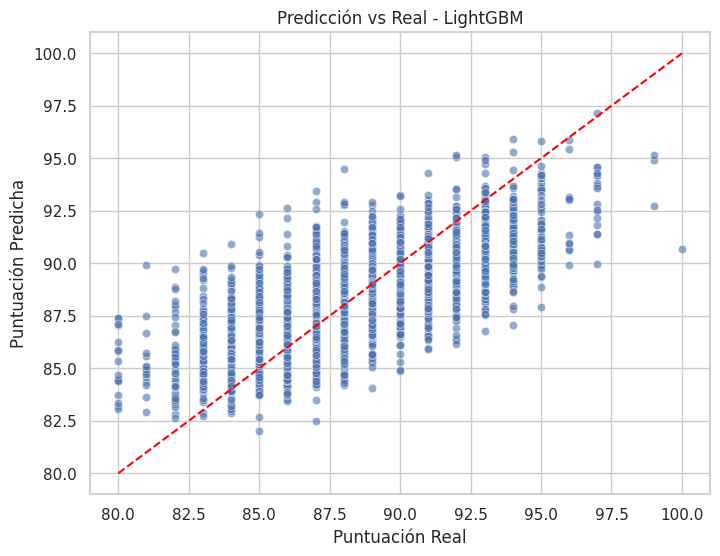

In [54]:
# 2Ô∏è‚É£ Gr√°fico de Dispersi√≥n - Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lgbm_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Puntuaci√≥n Real")
plt.ylabel("Puntuaci√≥n Predicha")
plt.title("Predicci√≥n vs Real - LightGBM")
plt.show()

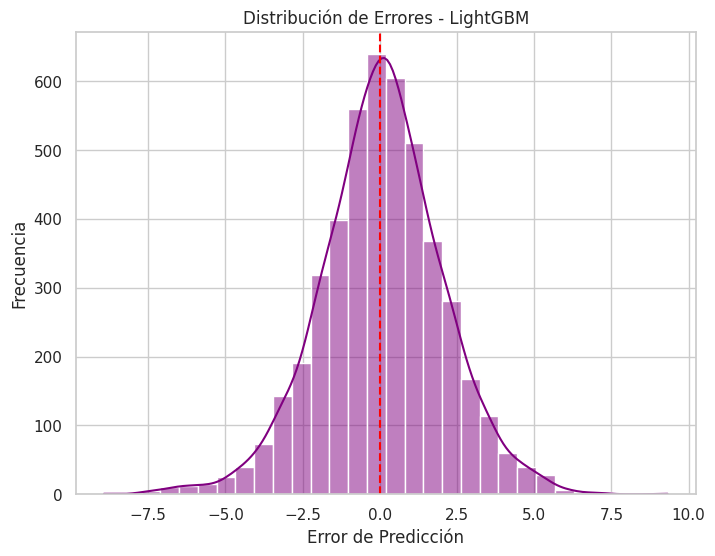

In [55]:
# 3Ô∏è‚É£ Distribuci√≥n de Errores
errors = y_test - lgbm_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Error de Predicci√≥n")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de Errores - LightGBM")
plt.show()

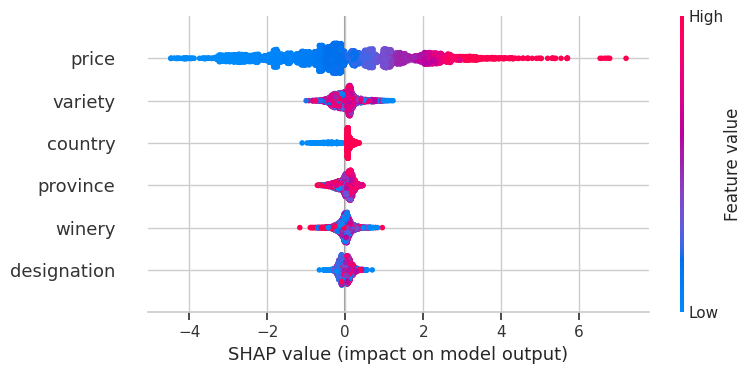

In [56]:
# 4Ô∏è‚É£ SHAP Values - Interpretabilidad
explainer = shap.Explainer(lgbm_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)